In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import matplotlib.dates as matDates

In [232]:
confirmed_case = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed_death = pd.read_csv('time_series_covid19_deaths_global.csv')

In [233]:
confirmed_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205324,205391,205506,205541,205612,205612,205802,205830,205907,206073
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333282,333293,333305,333316,333322,333330,333330,333338,333343,333360
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271035,271041,271050,271057,271061,271061,271079,271082,271090,271096
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,46824,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,104491,104491,104491,104491,104491,104491,104491,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333721,333721,333746,333746,333746


In [234]:
confirmed_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7833,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,156,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1923,1923,1923,1923,1923,1923,1923,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


In [235]:
confirmed_case['Total_cases'] = confirmed_case.iloc[:,4:].sum(axis=1)

In [236]:
confirmed_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,Total_cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,109596433
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,152829928
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,156153493
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,47219,47219,19868545
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104491,104676,104676,49726513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,343629272
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,162032
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,6708825
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333721,333721,333746,333746,333746,162802502


In [237]:
confirmed_death['Total_Death_Cases'] = confirmed_death.iloc[:,4:].sum(axis=1)
confirmed_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,Total_Death_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7834,4650362
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,2132993
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,4226937
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,157,157,111151
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1923,1924,1924,1042716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,3195325
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,1303864
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,2236085


In [238]:
new_confirmed_case = confirmed_case[['Province/State', 'Country/Region', 'Total_cases']]
new_confirmed_case

,Province/State,Country/Region,Total_cases
0,NaN,Afghanistan,109596433
1,NaN,Albania,152829928
2,NaN,Algeria,156153493
3,NaN,Andorra,19868545
4,NaN,Angola,49726513
...,...,...,...
284,NaN,West Bank and Gaza,343629272
285,NaN,Winter Olympics 2022,162032
286,NaN,Yemen,6708825
287,NaN,Zambia,162802502


In [239]:
new_confirmed_death = confirmed_death[['Province/State', 'Country/Region', 'Total_Death_Cases']]
new_confirmed_death

,Province/State,Country/Region,Total_Death_Cases
0,NaN,Afghanistan,4650362
1,NaN,Albania,2132993
2,NaN,Algeria,4226937
3,NaN,Andorra,111151
4,NaN,Angola,1042716
...,...,...,...
284,NaN,West Bank and Gaza,3195325
285,NaN,Winter Olympics 2022,0
286,NaN,Yemen,1303864
287,NaN,Zambia,2236085


In [240]:
global_data = pd.merge(new_confirmed_case, new_confirmed_death, on=['Province/State', 'Country/Region'])
global_data

,Province/State,Country/Region,Total_cases,Total_Death_Cases
0,NaN,Afghanistan,109596433,4650362
1,NaN,Albania,152829928,2132993
2,NaN,Algeria,156153493,4226937
3,NaN,Andorra,19868545,111151
4,NaN,Angola,49726513,1042716
...,...,...,...,...
284,NaN,West Bank and Gaza,343629272,3195325
285,NaN,Winter Olympics 2022,162032,0
286,NaN,Yemen,6708825,1303864
287,NaN,Zambia,162802502,2236085


## Alpha-Vantage

In [241]:
api_key = '87FT3I3RK5F9TKMJ'
ts = TimeSeries(key=api_key, output_format='pandas')
canadian = ts.get_daily_adjusted('SHOP', outputsize='full')
american = ts.get_daily_adjusted('NASDX', outputsize='full')
travel = ts.get_daily_adjusted('AC', outputsize='full')
real_estate = ts.get_daily_adjusted('PLD', outputsize='full')
precious_metals = ts.get_daily_adjusted('CIGI', outputsize='full')

In [242]:
canadian_df = pd.DataFrame(canadian[0]).reset_index(level=0)
american_df = pd.DataFrame(american[0]).reset_index(level=0)
travel_df = pd.DataFrame(travel[0]).reset_index(level=0)
real_estate_df = pd.DataFrame(real_estate[0]).reset_index(level=0)
precious_metals_df = pd.DataFrame(precious_metals[0]).reset_index(level=0)

In [243]:
canadian_df.drop('8. split coefficient', inplace=True, axis=1)

In [244]:
canadian_df

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2022-12-05,42.77,43.70,40.41,40.79,40.790,21937611.0,0.0
1,2022-12-02,42.15,45.06,42.01,43.06,43.060,30820931.0,0.0
2,2022-12-01,41.45,43.74,41.30,43.40,43.400,33691868.0,0.0
3,2022-11-30,37.42,40.90,37.09,40.88,40.880,30671795.0,0.0
4,2022-11-29,38.48,39.96,36.73,37.15,37.150,29118158.0,0.0
...,...,...,...,...,...,...,...,...
1895,2015-05-28,27.55,27.74,26.48,27.45,2.745,400367.0,0.0
1896,2015-05-27,30.67,30.81,27.00,27.50,2.750,797976.0,0.0
1897,2015-05-26,29.80,30.34,29.08,29.65,2.965,819733.0,0.0
1898,2015-05-22,26.17,31.10,26.00,28.31,2.831,2842781.0,0.0


In [245]:
american_df.drop('8. split coefficient', inplace=True, axis=1)

In [246]:
travel_df.drop('8. split coefficient', inplace=True, axis=1)

In [247]:
real_estate_df.drop('8. split coefficient', inplace=True, axis=1)

In [248]:
precious_metals_df.drop('8. split coefficient', inplace=True, axis=1)

In [249]:
american_df = american_df[['date', '2. high', '3. low']].rename(columns={'2. high': 'american_high', '3. low': 'american_low'})
canadian_df = canadian_df[['date', '2. high', '3. low']].rename(columns={'2. high': 'canadian_high', '3. low': 'canadian_low'})
travel_df = travel_df[['date', '2. high', '3. low']].rename(columns={'2. high': 'travel_high', '3. low': 'travel_low'})
real_estate_df = real_estate_df[['date', '2. high', '3. low']].rename(columns={'2. high': 'real_estate_high', '3. low': 'real_estate_low'})
precious_metals_df = precious_metals_df[['date', '2. high', '3. low']].rename(columns={'2. high': 'precious_metals_high', '3. low': 'precious_metals_low'})

In [250]:
stocks_df = canadian_df.merge(american_df, on='date').merge(travel_df, on='date').merge(real_estate_df, on='date').merge(precious_metals_df, on='date')

stocks_df

,date,canadian_high,canadian_low,american_high,american_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metals_high,precious_metals_low
0,2022-12-01,43.74,41.300,26.01,26.01,40.4500,38.13,119.49,115.74,96.95,92.37
1,2022-11-30,40.90,37.090,25.97,25.97,40.4500,38.00,117.82,112.49,94.68,91.22
2,2022-11-29,39.96,36.730,25.57,25.57,40.9800,38.60,114.12,111.26,92.65,91.16
3,2022-11-28,40.15,37.537,25.75,25.75,42.0000,40.37,116.85,110.92,94.17,91.49
4,2022-11-25,37.01,36.040,26.13,26.13,40.6000,40.60,116.94,115.26,94.98,93.37
...,...,...,...,...,...,...,...,...,...,...,...
1759,2015-12-07,27.15,26.540,12.02,12.02,34.7500,33.74,42.83,42.37,44.30,43.70
1760,2015-12-04,27.40,26.540,12.08,12.08,34.4900,33.90,42.72,41.63,44.43,43.73
1761,2015-12-03,26.88,26.130,11.80,11.80,36.5100,33.87,42.73,41.29,44.87,43.57
1762,2015-12-02,26.57,25.800,12.01,12.01,35.5300,33.33,43.49,42.19,45.74,44.24


In [251]:
canada_deaths = confirmed_death[confirmed_death['Country/Region'] == "Canada"].groupby("Country/Region").sum()
usa_deaths = confirmed_death[confirmed_death['Country/Region'] == "US"].groupby("Country/Region").sum()

canada_cases = confirmed_case[confirmed_case['Country/Region'] == "Canada"].groupby("Country/Region").sum()
usa_cases = confirmed_case[confirmed_case['Country/Region'] == "US"].groupby("Country/Region").sum()

In [252]:
df_canada_deaths = canada_deaths.reset_index().drop(columns=["Lat","Long"]).T.reset_index()

df_canada_deaths.columns = ["date","Canada_deaths"]
df_canada_deaths = df_canada_deaths.iloc[1:-1]

df_usa_deaths = usa_deaths.reset_index().drop(columns=["Lat","Long"]).T.reset_index()

df_usa_deaths.columns = ["date","US_Death_Cases"]
df_usa_deaths = df_usa_deaths.iloc[1:-1]


In [253]:
df_canada_cases = canada_cases.reset_index().drop(columns=["Lat","Long"]).T.reset_index()

df_canada_cases.columns = ["date","Canada_Confirmed_Cases"]
df_canada_cases = df_canada_cases.iloc[1:-1]

df_usa_cases = usa_cases.reset_index().drop(columns=["Lat","Long"]).T.reset_index()

df_usa_cases.columns = ["date","US_Confirmed_Cases"]
df_usa_cases = df_usa_cases.iloc[1:-1]

In [254]:
confirm_df = df_canada_cases.merge(df_usa_cases, on='date')
death_df = df_canada_deaths.merge(df_usa_deaths, on='date')

final_df = confirm_df.merge(death_df, on='date')

In [255]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [256]:
final_df

,date,Canada_Confirmed_Cases,US_Confirmed_Cases,Canada_deaths,US_Death_Cases
0,2020-01-22,0,1,0,0
1,2020-01-23,2,1,0,0
2,2020-01-24,3,2,0,0
3,2020-01-25,3,2,0,0
4,2020-01-26,3,5,0,0
...,...,...,...,...,...
1040,2022-11-27,4428546,98573468,47862,1079296
1041,2022-11-28,4430558,98633140,47923,1079576
1042,2022-11-29,4431111,98697622,47923,1079969
1043,2022-11-30,4432426,98807782,48002,1080536


In [257]:
final_df = final_df.merge(stocks_df, on='date', how='left')

In [258]:
final_df

,date,Canada_Confirmed_Cases,US_Confirmed_Cases,Canada_deaths,US_Death_Cases,canadian_high,canadian_low,american_high,american_low,travel_high,travel_low,real_estate_high,real_estate_low,precious_metals_high,precious_metals_low
0,2020-01-22,0,1,0,0,476.786,463.170,21.00,21.00,64.90,56.00,96.38,93.72,82.56,81.68
1,2020-01-23,2,1,0,0,473.000,460.000,21.07,21.07,57.48,46.96,95.75,93.12,82.14,80.91
2,2020-01-24,3,2,0,0,476.510,457.830,20.90,20.90,47.78,42.30,96.78,95.57,82.24,81.14
3,2020-01-25,3,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,3,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2022-11-27,4428546,98573468,47862,1079296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2022-11-28,4430558,98633140,47923,1079576,40.150,37.537,25.75,25.75,42.00,40.37,116.85,110.92,94.17,91.49
1042,2022-11-29,4431111,98697622,47923,1079969,39.960,36.730,25.57,25.57,40.98,38.60,114.12,111.26,92.65,91.16
1043,2022-11-30,4432426,98807782,48002,1080536,40.900,37.090,25.97,25.97,40.45,38.00,117.82,112.49,94.68,91.22


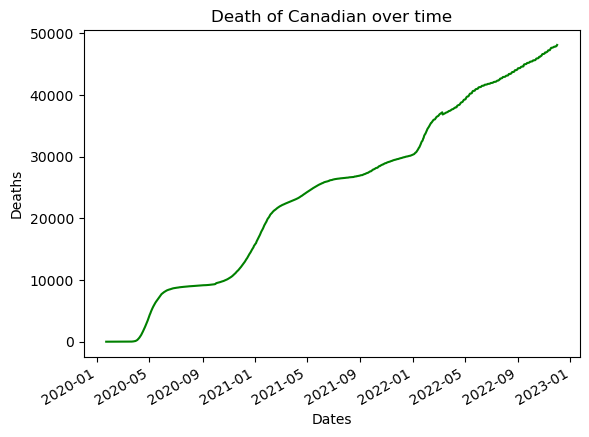

In [259]:
fig = plt.figure()
plt.plot_date(final_df['date'], final_df['Canada_deaths'], 'g-')

plt.title('Death of Canadian over time')
plt.xlabel('Dates')
plt.ylabel('Deaths')

fig.autofmt_xdate()

plt.show()

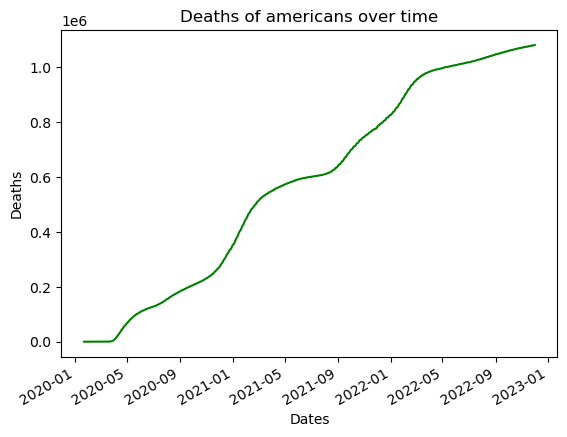

In [260]:
fig = plt.figure()
plt.plot_date(final_df['date'], final_df['US_Death_Cases'], 'g-')

plt.title('Deaths of americans over time')
plt.xlabel('Dates')
plt.ylabel('Deaths')

fig.autofmt_xdate()
plt.show()

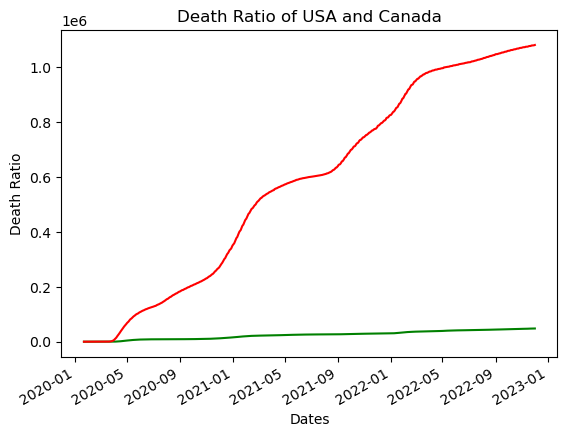

In [261]:
fig = plt.figure()
plt.plot_date(final_df['date'], final_df['Canada_deaths'], 'g-')
plt.plot_date(final_df['date'], final_df['US_Death_Cases'], 'r-')

plt.title('Death Ratio of USA and Canada')
plt.xlabel('Dates')
plt.ylabel('Death Ratio')

fig.autofmt_xdate()
plt.show()

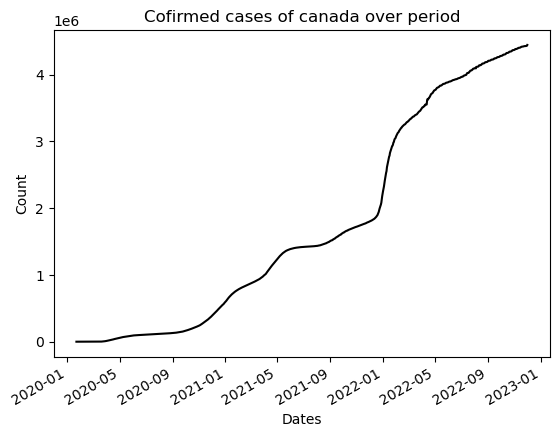

In [262]:
fig = plt.figure()
plt.plot_date(final_df['date'], final_df['Canada_Confirmed_Cases'], 'black')

plt.title('Cofirmed cases of canada over period')
plt.xlabel('Dates')
plt.ylabel('Count')

fig.autofmt_xdate()
plt.show()

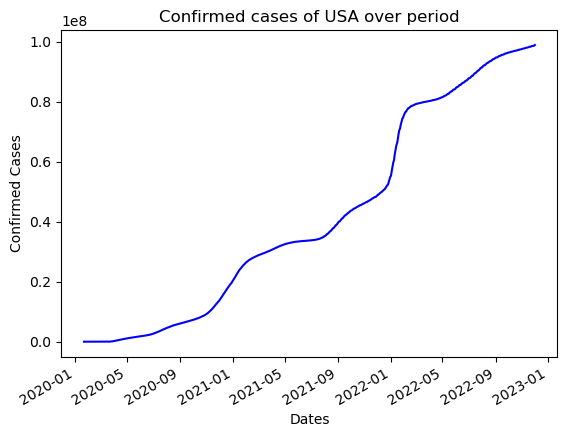

In [263]:
fig= plt.figure()
plt.plot_date(final_df['date'], final_df['US_Confirmed_Cases'], 'b-')

plt.title('Confirmed cases of USA over period')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')

fig.autofmt_xdate()
plt.show()

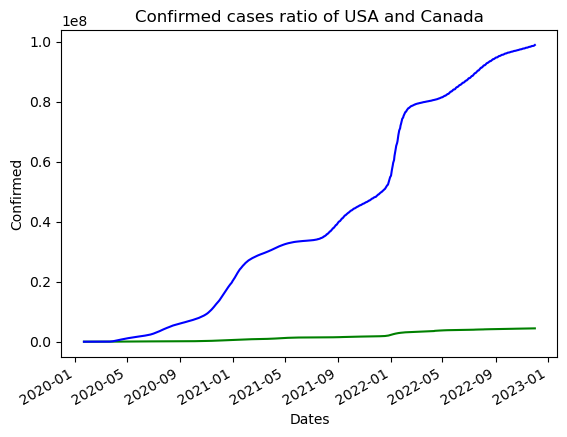

In [264]:
fig = plt.figure()
plt.plot_date(final_df['date'], final_df['Canada_Confirmed_Cases'], 'g-')
plt.plot_date(final_df['date'], final_df['US_Confirmed_Cases'], 'b-')

plt.title('Confirmed cases ratio of USA and Canada')
plt.xlabel('Dates')
plt.ylabel('Confirmed')

fig.autofmt_xdate()
plt.show()

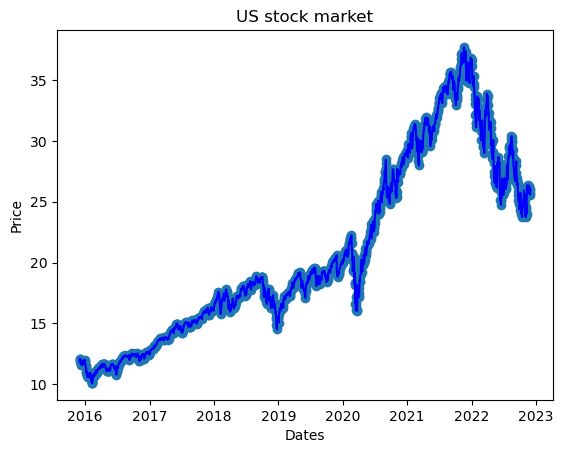

In [265]:
fig = plt.figure()
plt.plot_date(stocks_df['date'], stocks_df['american_low'])
plt.plot_date(stocks_df['date'], stocks_df['american_high'], 'b-')

plt.title('US stock market')
plt.xlabel('Dates')
plt.ylabel('Price')

plt.show()

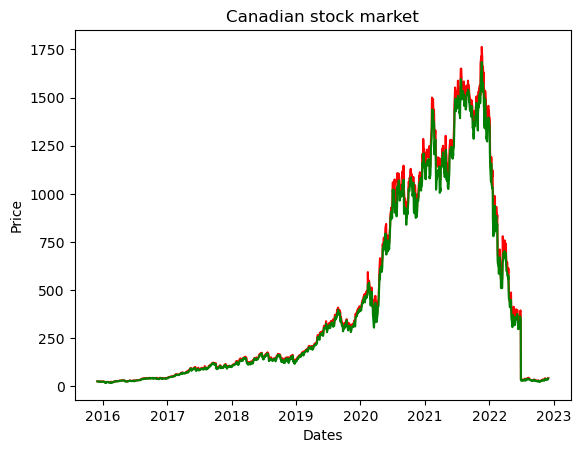

In [266]:
fig = plt.figure()
plt.plot_date(stocks_df['date'], stocks_df['canadian_high'], 'r-')
plt.plot_date(stocks_df['date'], stocks_df['canadian_low'], 'g-')

plt.title('Canadian stock market')
plt.xlabel('Dates')
plt.ylabel('Price')

plt.show()